In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import random
%matplotlib inline


In [2]:
words = open('names.txt','r').read().splitlines()
words[:5]

['piotr', 'emma', 'olivia', 'ava', 'isabella']

In [3]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [4]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [5]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [6]:
def build_datasets(words):
    X,Y = [],[]
    for w in words:
         context_window = [0] * 3 # context window of 3
         for ch in w + '.':
            ix = stoi[ch]
            X.append(context_window)
            Y.append(ix)
            context_window = context_window[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X,Y
random.seed(2137)
random.shuffle(words)
n1 = int(0.85*len(words))
n2 = int(0.9 * len(words))

Xtrain, Ytrain = build_datasets(words[:n1])
Xdev,Ydev = build_datasets(words[n1:n2])
Xtest, Ytest = build_datasets(words[n2:])
        
        

In [7]:
Xtrain.shape

torch.Size([193951, 3])

In [8]:
g = torch.Generator().manual_seed(694202137)
C = torch.randn((27,10),generator=g, requires_grad = True)
W1 = torch.randn((30,200),generator=g, requires_grad = True)
B1 = torch.randn(200, generator = g, requires_grad = True)
W2  = torch.randn((200,27),generator=g, requires_grad = True)
B2 = torch.randn(27, generator = g, requires_grad = True)

parametes = [C,W1,B1,W2,B2]

In [9]:
steps = []
losses =[]


In [30]:
for i in range (200000):
    ix = torch.randint(0,Xtrain.shape[0],(64,))

    #forward pass
    emb = C[Xtrain[ix]]
    h = torch.tanh(emb.view(-1,30) @ W1 + B1)
    logits = h @ W2 + B2
    loss = F.cross_entropy(logits,Ytrain[ix])

    #backward pass
    for p in parametes:
        p.grad = None
    loss.backward()
    lr = 0.1 if i<=100000 else 0.02
    for p in parametes:
        p.data += -lr*p.grad

    steps.append(i)
    losses.append(loss.item())
    

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

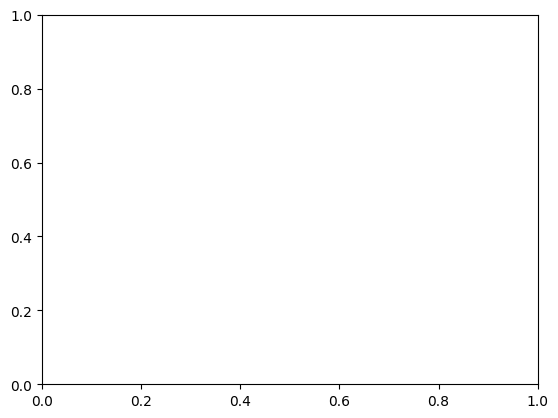

In [23]:
plt.plot(steps,losses)

In [31]:
#loss over entire set
emb = C[Xtrain]
h = torch.tanh(emb.view(-1,30) @W1 + B1)
logits = h @ W2 + B2
loss = F.cross_entropy(logits,Ytrain)
loss

tensor(2.0507, grad_fn=<NllLossBackward0>)

In [32]:
#loss over dev set
emb = C[Xdev]
h = torch.tanh(emb.view(-1,30) @W1 + B1)
logits = h @ W2 + B2
loss = F.cross_entropy(logits,Ydev)
loss

tensor(2.1326, grad_fn=<NllLossBackward0>)

In [41]:
g = torch.Generator().manual_seed(694202137 + 404)
for k in range(20):
    out =[]
    context = [0]*3
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1,-1) @ W1 + B1)
        logits = h @ W2 + B2
        probs  = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs,num_samples=1,replacement=True,generator=g).item()
        context = context[1:] + [ix]
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

lar.
joelia.
ara.
hiviataliana.
ail.
liliah.
rowy.
pin.
jolivi.
jayda.
jenna.
demuisaiaga.
miktooghin.
theveikona.
jemiratany.
rue.
lin.
rayston.
devaley.
vayla.
